In [98]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [81]:

cmpnyLs = [
    "TOSYY",
    "INTC",
    "TXN",
    "SHCAY",
    "HTHIY",
    "FJTSY",
    "AMD",
    "STM",
    "IBM"
]
DF = pd.DataFrame()
latest = pd.DataFrame()
dateDF = pd.DataFrame()
for company in cmpnyLs:
    dateDF["Earnings Date"] = yf.Ticker(company).earnings_history["Earnings Date"]
    print(company)
    for i in range(len(dateDF)):
        datum = dateDF["Earnings Date"][i]
        try:
            dateLs = datum.split(",")
            dateDF["Earnings Date"][i] = datetime.strptime(f'{dateLs[0]},{dateLs[1]}', "%b %d, %Y").date()
        except:
            continue
    DF["Earnings Date"] = dateDF["Earnings Date"].copy()
    DF[f'EPS {company}'] = yf.Ticker(company).earnings_history["Reported EPS"].copy() #pulls earnings per share into dataframe

del DF["EPS SHCAY"]
del DF["EPS FJTSY"]
del DF["EPS TOSYY"]



TOSYY
INTC
TXN
SHCAY
HTHIY
FJTSY
AMD
STM
IBM


In [139]:
cmpnyLs = ["INTC", "TXN","HTHIY", "AMD", "STM", "IBM"]
EPSPre = pd.DataFrame()

for company in cmpnyLs:
    print(company)

    temp = yf.Ticker(company).earnings_dates
    EPS = temp["Reported EPS"].copy()
    EPS = EPS.loc[EPS.index<"2019"]
    EPS = EPS.loc[EPS.index>"2017"]
    EPS.to_csv(f"graphData/pre{company}.csv")







INTC
TXN
HTHIY
AMD
STM
IBM


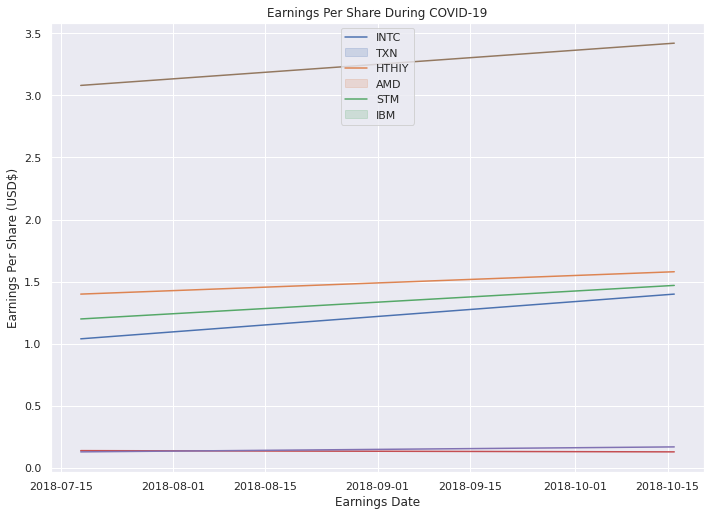

In [38]:
dt = pd.DataFrame()


# post = DF.loc[DF["Earnings Date"]>date(2020,1,1)]
# post = post.loc[DF["Earnings Date"]<date(2022,1,1)]
# post.to_csv("EPSpost.csv")

DFpre = DF.loc[DF["Earnings Date"]>date(2017,1,1)]
DFpre = DFpre.loc[DF["Earnings Date"]<date(2019,1,1)]
DFpre.head()
DFpre.to_csv("EPSpre.csv")

dt["Earnings Date"] = post["Earnings Date"].copy()
colu = list(DFpre)
colu = colu[1:]
ax, fig = plt.subplots(1,1)
for comp in colu:
    ax = sns.lineplot(data = DFpre, x ="Earnings Date", y=comp, legend= "auto")

for i in range(len(colu)):
    colu[i] = colu[i].split(" ")[-1]
ax.legend(colu);
ax.set_ylabel("Earnings Per Share (USD$)")
ax.set_title("Earnings Per Share During COVID-19")

#ax.set_xlim(date(2020,1,30), date(2021,10,15))


ax.get_figure().savefig("EPSpost19.png")


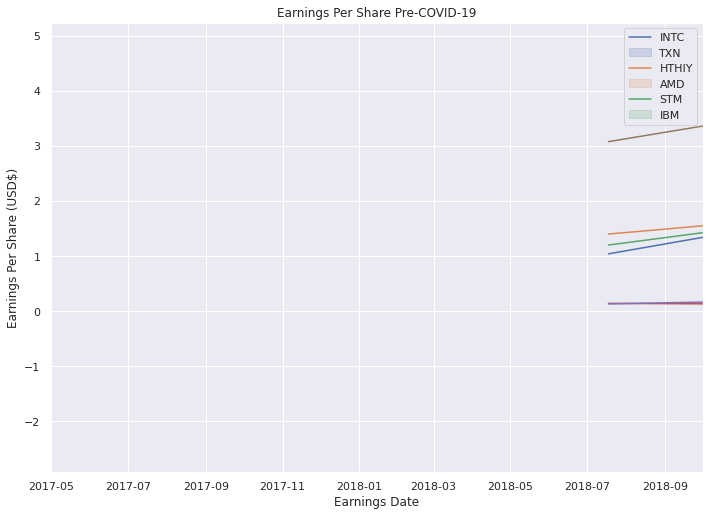

In [45]:
colu = list(DFpre)
colu = colu[1:]
ax, fig = plt.subplots(1,1)
for comp in colu:
    ax = sns.lineplot(data = DF, x ="Earnings Date", y=comp, legend= "auto")

for i in range(len(colu)):
    colu[i] = colu[i].split(" ")[-1]
ax.legend(colu);
ax.set_ylabel("Earnings Per Share (USD$)")
ax.set_title("Earnings Per Share Pre-COVID-19")

ax.set_xlim(date(2017,4,30), date(2018,10,1))


ax.get_figure().savefig("EPSpre19.png")



In [7]:
quote = yf.download(tickers= "TOSYY", interval= "1d", period="5y").copy()
quote["day_time"] = quote.index
quote["day_time"] = pd.to_datetime(quote["day_time"], format="%Y-%m-%d")
quote = quote.loc[quote["day_time"] > "2018"]
quote = quote.loc[quote["day_time"] < "2019"]
value = quote["Close"][0]
dfClose[f"{company} Stock Value Change (%)"] = (quote["Close"]/value - 1)*100


[*********************100%***********************]  1 of 1 completed


NameError: name 'dfClose' is not defined

In [20]:
cmpnyLs = [
    "TOSYY",
    "INTC",
    "TXN",
    "SHCAY",
    "HTHIY",
    "FJTSY",
    "AMD",
    "STM",
    "IBM"
]
dfClose = pd.DataFrame()
for company in cmpnyLs:
    quote = yf.download(tickers= company, interval= "1d", period="6y").copy()
    quote["day_time"] = quote.index
    quote["day_time"] = pd.to_datetime(quote["day_time"], format="%Y-%m-%d")
    quote = quote.loc[quote["day_time"] > "2020"]
    quote = quote.loc[quote["day_time"] < "2022"]
    value = quote["Close"][0]
    dfClose[f"{company} Stock Value Change (%)"] = (quote["Close"]/value - 1)*100







[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
dfClose.head()

,TOSYY Stock Value Change (%),INTC Stock Value Change (%),TXN Stock Value Change (%),SHCAY Stock Value Change (%),HTHIY Stock Value Change (%),FJTSY Stock Value Change (%),AMD Stock Value Change (%),STM Stock Value Change (%),IBM Stock Value Change (%)
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.411521,-1.216308,-1.327475,-1.308899,-1.206088,-0.893796,-1.018330,-2.007886,-0.797516
2020-01-06 00:00:00-05:00,1.058203,-1.495726,-2.014361,0.523560,0.257613,0.000000,-1.446027,-3.908211,-0.974743
2020-01-07 00:00:00-05:00,2.057615,-3.139382,-0.123488,0.785340,-0.187358,1.787593,-1.731158,-2.366439,-0.908293
2020-01-08 00:00:00-05:00,1.704874,-3.073634,0.146629,0.523560,-0.491801,3.680330,-2.586551,-1.900318,-0.081230


In [22]:
dfClose.to_csv("closePost.csv")
#dfClosePost = dfClosePost[dfClose["day_time"] > "2020"]

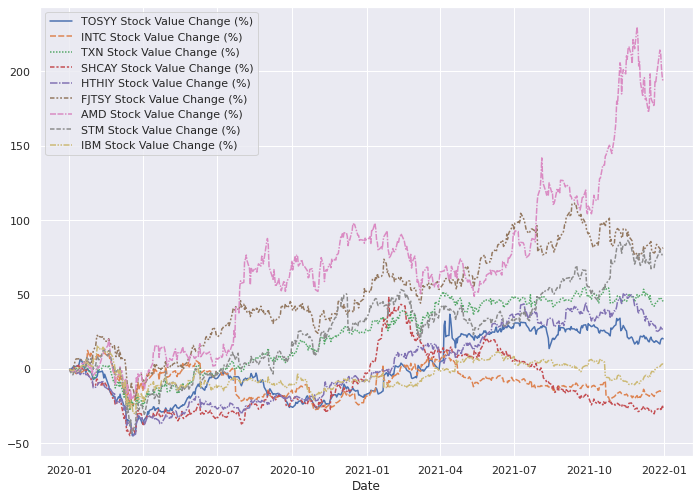

In [23]:
fig = sns.lineplot(data = dfClose);

